In [1]:
## ASSIGNMENT 6 (MINI PROJECT)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
titanic_data = pd.read_csv("C:\\Users\\Acer\\Desktop\\ML Practicles\\Assignment 6 MP\\train.csv")
titanic_test = pd.read_csv("C:\\Users\\Acer\\Desktop\\ML Practicles\\Assignment 6 MP\\test.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_data.shape

(891, 12)

In [17]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
titanic_data = titanic_data.drop(columns='Cabin', axis = 1)

In [21]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace= True)

In [22]:
print(titanic_data['Embarked'].mode()[0])

S


In [23]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace= True)

In [24]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
titanic_data.shape

(891, 11)

In [26]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [27]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [28]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
titanic_data.replace({'Sex':{'male':0,'female':1}}, inplace = True)

In [30]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
titanic_data.replace({'Embarked':{'S':0,'C':1, 'Q':2}}, inplace = True)

In [32]:
titanic_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [33]:
sns.set()

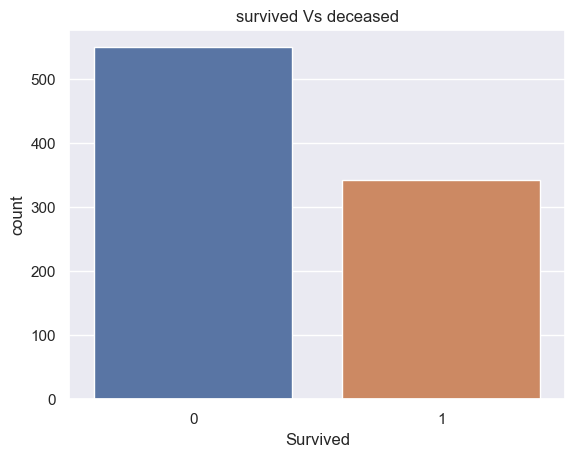

In [34]:
sns.countplot(x = titanic_data['Survived']).set_title('survived Vs deceased');

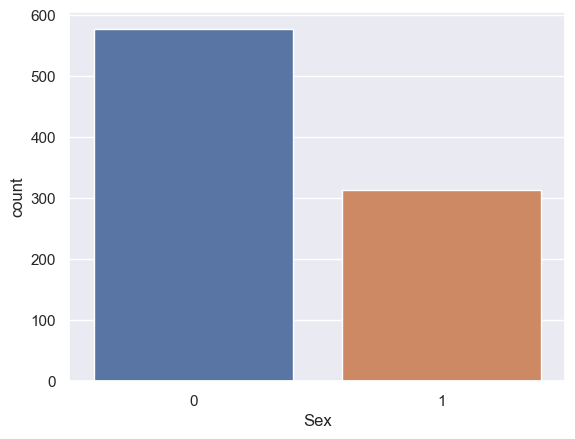

In [35]:
sns.countplot(x = titanic_data['Sex']);

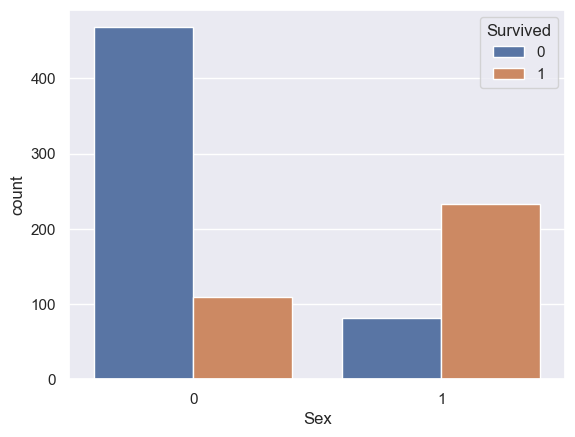

In [38]:
#sns.countplot('Sex', hue='Survived', data = titanic_data);
sns.countplot(x='Sex', hue='Survived', data=titanic_data)



In [39]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

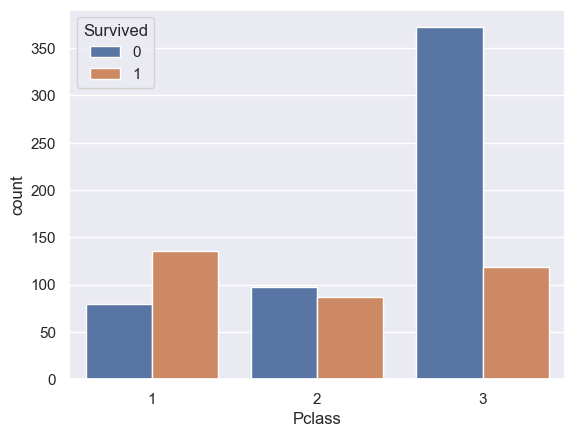

In [41]:
#sns.countplot('Pclass', hue='Survived', data = titanic_data);
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

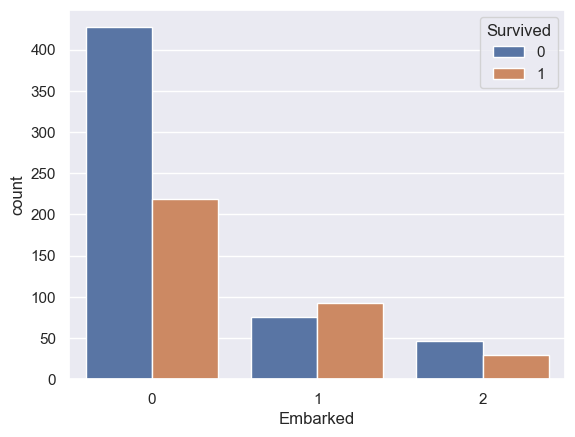

In [42]:
sns.countplot(x='Embarked', hue='Survived', data = titanic_data);

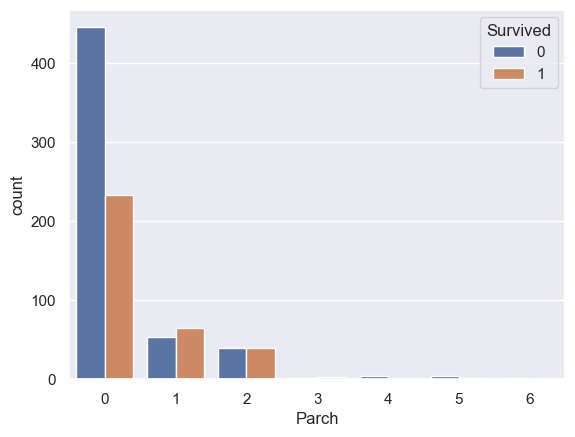

In [43]:
sns.countplot(x='Parch', hue='Survived', data = titanic_data);

In [44]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [45]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

In [46]:
X = titanic_data.drop(columns= ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [47]:
print(X,Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,random_state=2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(712, 7) (179, 7) (712,) (179,)


## Model Training:

## Logistic Regression

In [50]:
logreg = LogisticRegression()

In [51]:
logreg.fit(X_train,Y_train)

LogisticRegression()

## Model Evaluation:

In [52]:
X_train_pred = logreg.predict(X_train)
X_train_pred.shape

(712,)

In [53]:
ac_training = accuracy_score(Y_train,X_train_pred)
print('Training Accuracy= ', round(ac_training * 100),'%')

Training Accuracy=  81 %


In [54]:
X_test_pred = logreg.predict(X_test)
X_test_pred.shape

(179,)

In [55]:
ac_testing = accuracy_score(Y_test,X_test_pred)
print('Testing Accuracy= ', round(ac_testing * 100),'%')

Testing Accuracy=  78 %


In [56]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,X_test_pred)
cf

array([[91,  9],
       [30, 49]], dtype=int64)